## Testing Implied Limits on Span when Aspect Ratio and MTOM are Bounded

In [17]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0, os.path.abspath(".."))

from AetheriaPackage.GeneralConstants import g0
from AetheriaPackage.optimization import read_optimization_variables

def calc_span_bound(WS:float, A:np.ndarray, MTOM:np.ndarray) -> np.ndarray:
    
    '''
    Function to compute the bound on span implied by a bounded AR and a given MTOM.

    Paramters
    ---------
    WS : float [N/m2]
        Wing loading
    A : np.ndarray [-]
        Array of aspect ratios (one-dimensional)
    MTOM : np.ndarray [Kg]
        Maximum take-off mass (one-dimensional)
    
    Returns
    -------
    b : np.ndarray [m]
        Array of spans.
    '''
    # cast into ndarrays
    A = np.array(A)
    MTOM = np.array(MTOM)

    S = MTOM*g0/WS
    
    A = A.reshape(-1, 1)

    b = np.sqrt(A*S)

    return b

# copied from one of the outputs (it stays constant)
WS = 1885.2749999999999

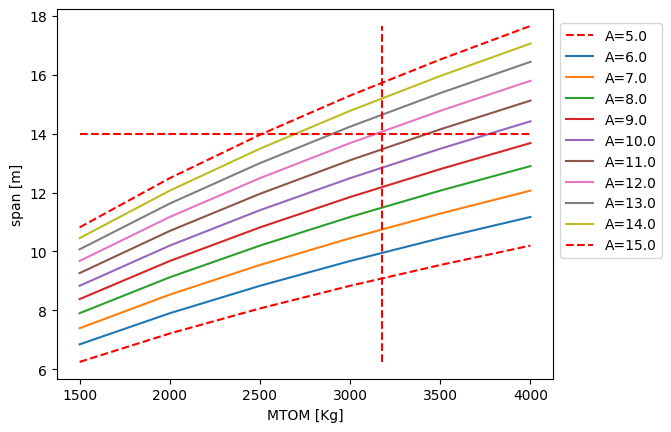

In [25]:
A = np.arange(5, 16)
MTOM = np.array([1500, 2000, 2500, 3000, 3500, 4000])

b = calc_span_bound(WS, A, MTOM)

style_constraint = {'ls':'--', 'color':'r'}
style_default = {}

for r in range(A.shape[0]):
    if A[r] in [5, 15]: style = style_constraint
    else: style = style_default
    plt.plot(MTOM, b[r,:], label=f'A={A[r]:.1f}', **style)

plt.xlabel('MTOM [Kg]')
plt.ylabel('span [m]')
plt.hlines(14, MTOM[0], MTOM[-1], **style_constraint)
plt.vlines(3175, np.min(b), np.max(b), **style_constraint)
plt.legend(bbox_to_anchor=(1, 0.98), loc='upper left')

In [20]:
A = 9.289173813080794 # (-)
MTOM = 3246.2737754716995 #Kg

b = calc_span_bound(WS, A, MTOM)
b

array([[12.5243184]])